In [122]:
import pandas as pd
from datetime import datetime
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Replace 'file_path' with the path to your CSV file
file_path = "C:/Users/jose/Downloads/people.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,4defE49671cF860,Sydney,Shannon,Male,tvang@example.net,574-440-1423x9799,2020-07-09,Technical brewer
1,2,F89B87bCf8f210b,Regina,Lin,Male,helen14@example.net,001-273-664-2268x90121,1909-06-20,"Teacher, adult education"
2,3,Cad6052BDd5DEaf,Pamela,Blake,Female,brent05@example.org,927-880-5785x85266,1964-08-19,Armed forces operational officer
3,4,e83E46f80f629CD,Dave,Hoffman,Female,munozcraig@example.org,001-147-429-8340x608,2009-02-19,Ship broker
4,5,60AAc4DcaBcE3b6,Ian,Campos,Female,brownevelyn@example.net,166-126-4390,1997-10-02,Media planner


In [123]:
# Assuming 'Date of birth' is in YYYY-MM-DD format
df['Date of birth'] = pd.to_datetime(df['Date of birth'])
df['Age'] = df['Date of birth'].apply(lambda x: datetime.now().year - x.year)

# Creating a new column 'Job_Title_Count' containing the total count of each Job Title
df['Job_Title_Count'] = df.groupby('Job Title')['Job Title'].transform('count')

In [124]:
df

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Age,Job_Title_Count
0,1,4defE49671cF860,Sydney,Shannon,Male,tvang@example.net,574-440-1423x9799,2020-07-09,Technical brewer,4,3087
1,2,F89B87bCf8f210b,Regina,Lin,Male,helen14@example.net,001-273-664-2268x90121,1909-06-20,"Teacher, adult education",115,3172
2,3,Cad6052BDd5DEaf,Pamela,Blake,Female,brent05@example.org,927-880-5785x85266,1964-08-19,Armed forces operational officer,60,3133
3,4,e83E46f80f629CD,Dave,Hoffman,Female,munozcraig@example.org,001-147-429-8340x608,2009-02-19,Ship broker,15,3225
4,5,60AAc4DcaBcE3b6,Ian,Campos,Female,brownevelyn@example.net,166-126-4390,1997-10-02,Media planner,27,3091
...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999996,AbBE4F3Eb5df843,Susan,Ellison,Male,yward@example.net,855.222.4135x62040,1913-01-05,Research scientist (maths),111,3177
1999996,1999997,e71af3E8De63CDF,Cole,Sherman,Female,nbarnett@example.org,(130)829-9159x800,1977-04-15,Marketing executive,47,3126
1999997,1999998,fAF0618097acD1B,Ethan,Leonard,Male,brett57@example.com,514.898.2376x3069,1960-08-14,Photographer,64,3160
1999998,1999999,f1FC3346F68DFAb,Jordan,Waller,Female,harveykendra@example.com,6920274656,1911-09-05,Chartered accountant,113,3114


Dropping rows for peple likely too young or retired (not in the typical working age range). Assuming the working age range is from 16 to 65 years old.

In [125]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Define working age range
min_working_age = 16
max_working_age = 65

# Filter the DataFrame to keep only rows where 'Age' is within the working age range
df = df[(df['Age'] >= min_working_age) & (df['Age'] <= max_working_age)]

In [126]:
# # We are going to model only Jobs_Title_Count higher than 3200
# df = df[df['Job_Title_Count'] > 3200]

In [127]:
df

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Age,Job_Title_Count
2,3,Cad6052BDd5DEaf,Pamela,Blake,Female,brent05@example.org,927-880-5785x85266,1964-08-19,Armed forces operational officer,60,3133
4,5,60AAc4DcaBcE3b6,Ian,Campos,Female,brownevelyn@example.net,166-126-4390,1997-10-02,Media planner,27,3091
6,7,A00bacC18101d37,Dan,Castillo,Female,billmoody@example.net,(448)494-0852x63243,1975-04-09,Historic buildings inspector/conservation officer,49,3075
7,8,B012698Cf31cfec,Clinton,Cochran,Male,glenn94@example.org,4425100065,1966-07-19,"Engineer, mining",58,3191
9,10,9540a6df05eF6cf,James,Bailey,Male,pittmanterrence@example.com,(629)632-4570x1832,1963-05-13,Graphic designer,61,3174
...,...,...,...,...,...,...,...,...,...,...,...
1999991,1999992,0AfeFD9ccC5bEB5,Monica,Stevenson,Female,joann33@example.net,+1-387-791-8496x756,1982-07-18,Network engineer,42,3116
1999994,1999995,10E8AAe0f358104,Lauren,Holder,Female,heathcaitlyn@example.com,001-462-424-7588x807,1967-12-10,Government social research officer,57,3140
1999996,1999997,e71af3E8De63CDF,Cole,Sherman,Female,nbarnett@example.org,(130)829-9159x800,1977-04-15,Marketing executive,47,3126
1999997,1999998,fAF0618097acD1B,Ethan,Leonard,Male,brett57@example.com,514.898.2376x3069,1960-08-14,Photographer,64,3160


In [128]:
# Selecting only needed columns

# Dropping columns except 'Sex', 'Date of birth', and 'Job Title'
df = df[['Sex', 'Job Title','Age']]

# Renaming the column 'Job Title' to 'Job_Title'
df = df.rename(columns={'Job Title': 'Job_Title'})

df = df.reset_index(drop=True).rename_axis(None, axis=1)

df

,Sex,Job_Title,Age
0,Female,Armed forces operational officer,60
1,Female,Media planner,27
2,Female,Historic buildings inspector/conservation officer,49
3,Male,"Engineer, mining",58
4,Male,Graphic designer,61
...,...,...,...
862197,Female,Network engineer,42
862198,Female,Government social research officer,57
862199,Female,Marketing executive,47
862200,Male,Photographer,64


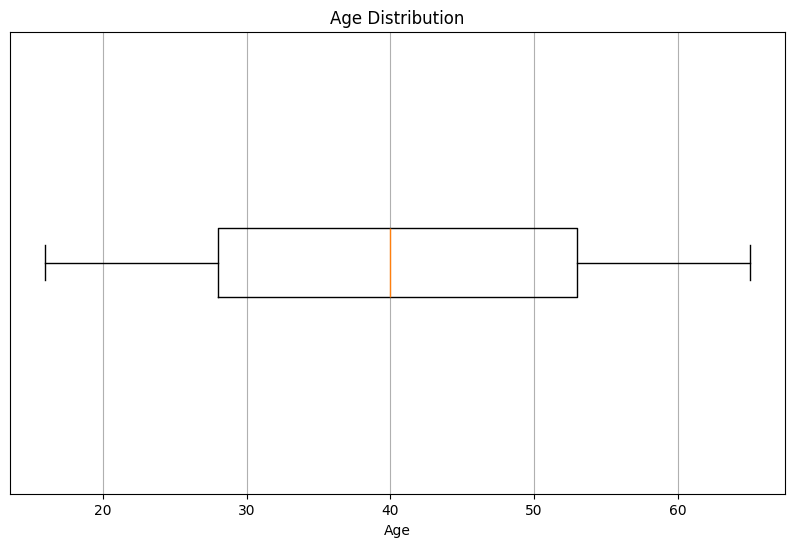

In [129]:
import matplotlib.pyplot as plt



# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(df.Age, vert=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.yticks([])  # Hide y-axis labels for clarity as there's only one dataset
plt.grid(True)
plt.show()


In [130]:
# Save the DataFrame to a CSV file
#df.to_csv('my_dataframe.csv', index=False)

In [131]:
import pandas as pd

# Add a unique identifier for each row within each group of 'Sex' and 'Job_Title'
df['unique_id'] = df.groupby(['Sex', 'Job_Title']).cumcount()

# Pivot the table, using 'Sex' and 'unique_id' as the index
df = df.pivot_table(index=['Sex', 'unique_id'], columns='Job_Title', values='Age').reset_index()
df  = df.rename_axis(None, axis=1) # Index with no name as it should be

# Drop the 'unique_id' column as it's no longer needed, keeping 'Sex'
df.drop('unique_id', axis=1, inplace=True)

# Display the result
df.head()

,Sex,Academic librarian,Accommodation manager,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered management","Accountant, chartered public finance",Accounting technician,Actor,Actuary,...,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer,Youth worker
0,Female,25.0,35.0,54.0,40.0,41.0,35.0,60.0,34.0,34.0,...,17.0,21.0,52.0,44.0,59.0,45.0,31.0,35.0,63.0,50.0
1,Female,53.0,32.0,40.0,44.0,57.0,55.0,16.0,43.0,40.0,...,19.0,23.0,20.0,52.0,48.0,56.0,31.0,54.0,54.0,32.0
2,Female,52.0,16.0,22.0,27.0,26.0,60.0,35.0,52.0,59.0,...,65.0,45.0,31.0,42.0,21.0,48.0,24.0,36.0,20.0,59.0
3,Female,62.0,17.0,37.0,46.0,26.0,26.0,65.0,51.0,27.0,...,35.0,21.0,42.0,44.0,44.0,54.0,18.0,44.0,52.0,18.0
4,Female,58.0,40.0,60.0,22.0,41.0,28.0,62.0,41.0,38.0,...,17.0,17.0,63.0,64.0,34.0,24.0,23.0,48.0,50.0,28.0


In [132]:
# Encoding "Sex" as binary values
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])  # Male will be 1, Female will be 0

In [133]:
df = df.dropna()

In [134]:
# Save the DataFrame to a CSV file
#pivoted_df.to_csv('my_dataframe.csv', index=False)

In [135]:
X = df.iloc[:,1:] # selecting all columns except column 8 | Dependent variable
y = df.iloc[:,0] # selecting column 8 as our target variable | Independent variable

In [136]:
# # Creating a backup
# df1 = df.copy()

In [137]:
X

,Academic librarian,Accommodation manager,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered management","Accountant, chartered public finance",Accounting technician,Actor,Actuary,Acupuncturist,...,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer,Youth worker
0,25.0,35.0,54.0,40.0,41.0,35.0,60.0,34.0,34.0,21.0,...,17.0,21.0,52.0,44.0,59.0,45.0,31.0,35.0,63.0,50.0
1,53.0,32.0,40.0,44.0,57.0,55.0,16.0,43.0,40.0,32.0,...,19.0,23.0,20.0,52.0,48.0,56.0,31.0,54.0,54.0,32.0
2,52.0,16.0,22.0,27.0,26.0,60.0,35.0,52.0,59.0,54.0,...,65.0,45.0,31.0,42.0,21.0,48.0,24.0,36.0,20.0,59.0
3,62.0,17.0,37.0,46.0,26.0,26.0,65.0,51.0,27.0,61.0,...,35.0,21.0,42.0,44.0,44.0,54.0,18.0,44.0,52.0,18.0
4,58.0,40.0,60.0,22.0,41.0,28.0,62.0,41.0,38.0,64.0,...,17.0,17.0,63.0,64.0,34.0,24.0,23.0,48.0,50.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,58.0,48.0,46.0,26.0,51.0,43.0,50.0,38.0,21.0,49.0,...,35.0,51.0,21.0,23.0,49.0,44.0,34.0,27.0,59.0,52.0
1338,64.0,63.0,45.0,21.0,37.0,60.0,63.0,52.0,16.0,46.0,...,64.0,42.0,31.0,25.0,45.0,20.0,46.0,56.0,24.0,65.0
1339,54.0,54.0,38.0,57.0,32.0,58.0,35.0,60.0,16.0,53.0,...,48.0,25.0,23.0,54.0,28.0,64.0,28.0,65.0,34.0,32.0
1340,59.0,53.0,54.0,28.0,52.0,17.0,32.0,43.0,39.0,46.0,...,56.0,52.0,26.0,30.0,48.0,54.0,37.0,37.0,65.0,16.0


In [138]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1337    1
1338    1
1339    1
1340    1
1341    1
Name: Sex, Length: 1184, dtype: int32

In [139]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [143]:
model = Sequential()
model.add(Dense(10,input_dim=639,activation='relu')) # First layer
model.add(Dense(10,activation='relu')) # Second layer
model.add(Dense(1,activation='sigmoid'))

In [144]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [145]:
model.fit(X,y,epochs=150,batch_size=10,verbose=2)

Epoch 1/150
119/119 - 1s - loss: 0.8229 - accuracy: 0.4780 - 510ms/epoch - 4ms/step
Epoch 2/150
119/119 - 0s - loss: 0.6037 - accuracy: 0.6926 - 110ms/epoch - 924us/step
Epoch 3/150
119/119 - 0s - loss: 0.5063 - accuracy: 0.8049 - 119ms/epoch - 1ms/step
Epoch 4/150
119/119 - 0s - loss: 0.4140 - accuracy: 0.8691 - 116ms/epoch - 977us/step
Epoch 5/150
119/119 - 0s - loss: 0.3198 - accuracy: 0.9113 - 115ms/epoch - 967us/step
Epoch 6/150
119/119 - 0s - loss: 0.2323 - accuracy: 0.9502 - 115ms/epoch - 969us/step
Epoch 7/150
119/119 - 0s - loss: 0.1607 - accuracy: 0.9721 - 121ms/epoch - 1ms/step
Epoch 8/150
119/119 - 0s - loss: 0.1090 - accuracy: 0.9865 - 119ms/epoch - 1ms/step
Epoch 9/150
119/119 - 0s - loss: 0.0744 - accuracy: 0.9907 - 110ms/epoch - 922us/step
Epoch 10/150
119/119 - 0s - loss: 0.0529 - accuracy: 0.9924 - 114ms/epoch - 955us/step
Epoch 11/150
119/119 - 0s - loss: 0.0388 - accuracy: 0.9949 - 116ms/epoch - 977us/step
Epoch 12/150
119/119 - 0s - loss: 0.0310 - accuracy: 0.9949 

Epoch 96/150
119/119 - 0s - loss: 0.0033 - accuracy: 0.9992 - 121ms/epoch - 1ms/step
Epoch 97/150
119/119 - 0s - loss: 0.0033 - accuracy: 0.9992 - 120ms/epoch - 1ms/step
Epoch 98/150
119/119 - 0s - loss: 0.0033 - accuracy: 0.9992 - 120ms/epoch - 1ms/step
Epoch 99/150
119/119 - 0s - loss: 0.0033 - accuracy: 0.9992 - 119ms/epoch - 1ms/step
Epoch 100/150
119/119 - 0s - loss: 0.0033 - accuracy: 0.9992 - 124ms/epoch - 1ms/step
Epoch 101/150
119/119 - 0s - loss: 0.0032 - accuracy: 0.9992 - 118ms/epoch - 992us/step
Epoch 102/150
119/119 - 0s - loss: 0.0032 - accuracy: 0.9992 - 116ms/epoch - 977us/step
Epoch 103/150
119/119 - 0s - loss: 0.0032 - accuracy: 0.9992 - 117ms/epoch - 984us/step
Epoch 104/150
119/119 - 0s - loss: 0.0032 - accuracy: 0.9992 - 120ms/epoch - 1ms/step
Epoch 105/150
119/119 - 0s - loss: 0.0032 - accuracy: 0.9992 - 119ms/epoch - 1ms/step
Epoch 106/150
119/119 - 0s - loss: 0.0032 - accuracy: 0.9992 - 118ms/epoch - 994us/step
Epoch 107/150
119/119 - 0s - loss: 0.0032 - accura

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df is your DataFrame and it's already loaded

# Encoding "Sex" as binary values
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])  # Male will be 1, Female will be 0

# One-hot encoding "Job Title"
onehot_encoder = OneHotEncoder(sparse=False)
job_title_encoded = onehot_encoder.fit_transform(df['Job_Title'].values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(job_title_encoded, df['Sex'], test_size=0.2, random_state=42)

# Building the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and saving the history
history = model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1)

# Converting history into a DataFrame
history_df = pd.DataFrame(history.history)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/20


C:\Users\jose\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


303/303 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4967
Epoch 2/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5023
Epoch 3/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5038
Epoch 4/20
303/303 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5039
Epoch 5/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5051
Epoch 6/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5053
Epoch 7/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5052
Epoch 8/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5053
Epoch 9/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5052
Epoch 10/20
303/303 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5051
Epoch 11/2

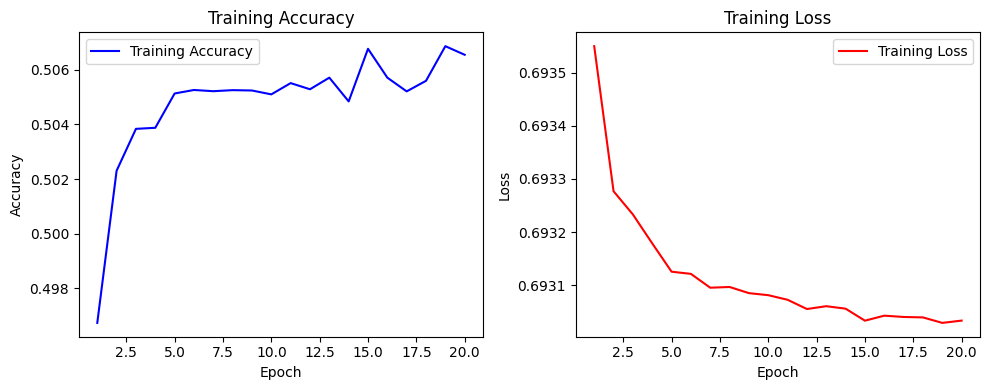

In [44]:
import matplotlib.pyplot as plt

# Extracting epochs
epochs = range(1, len(history_df) + 1)

# Plotting Training Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_df['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_df['loss'], label='Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [118]:
df1

,Sex,Job_Title
0,Female,Ship broker
1,Male,Maintenance engineer
2,Female,Geophysicist/field seismologist
3,Female,"Engineer, biomedical"
4,Male,Adult nurse
...,...,...
193685,Male,"Conservation officer, nature"
193686,Female,Academic librarian
193687,Male,Production engineer
193688,Female,Conference centre manager


In [119]:
# Count distinct Job Titles
distinct_job_titles_count = df1['Job_Title'].nunique()

print(f'There are {distinct_job_titles_count} distinct job titles.')


There are 60 distinct job titles.


In [120]:

import numpy as np


# Calculate the number of males needed to represent 10% of the dataset
num_males_needed = int(len(df1) * 0.1)

# Generate a random permutation of indices from the DataFrame
random_indices = np.random.permutation(df1.index)

# Select indices for males to achieve the 10/90 distribution
male_indices = random_indices[:num_males_needed]

# Create the new 'Sex_Adjusted' column with all 'Female'
df1['Sex_Adjusted'] = 'Female'

# Set 'Male' for the selected indices
df1.loc[male_indices, 'Sex_Adjusted'] = 'Male'

# Check the new distribution
distribution_adjusted = df1['Sex_Adjusted'].value_counts(normalize=True) * 100
print(distribution_adjusted)



Female    90.0
Male      10.0
Name: Sex_Adjusted, dtype: float64


In [121]:
df1

,Sex,Job_Title,Sex_Adjusted
0,Female,Ship broker,Female
1,Male,Maintenance engineer,Female
2,Female,Geophysicist/field seismologist,Female
3,Female,"Engineer, biomedical",Female
4,Male,Adult nurse,Female
...,...,...,...
193685,Male,"Conservation officer, nature",Female
193686,Female,Academic librarian,Female
193687,Male,Production engineer,Female
193688,Female,Conference centre manager,Female


In [122]:
# Selecting only needed columns

# Dropping columns except 'Sex', 'Date of birth', and 'Job Title'
df1 = df1[['Sex_Adjusted','Job_Title']]


In [123]:
df1

,Sex_Adjusted,Job_Title
0,Female,Ship broker
1,Female,Maintenance engineer
2,Female,Geophysicist/field seismologist
3,Female,"Engineer, biomedical"
4,Female,Adult nurse
...,...,...
193685,Female,"Conservation officer, nature"
193686,Female,Academic librarian
193687,Female,Production engineer
193688,Female,Conference centre manager


In [124]:
# Renaming the column 'Job Title' to 'Job_Title'
df1 = df1.rename(columns={'Sex_Adjusted': 'Sex'})

df1

,Sex,Job_Title
0,Female,Ship broker
1,Female,Maintenance engineer
2,Female,Geophysicist/field seismologist
3,Female,"Engineer, biomedical"
4,Female,Adult nurse
...,...,...
193685,Female,"Conservation officer, nature"
193686,Female,Academic librarian
193687,Female,Production engineer
193688,Female,Conference centre manager


In [125]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df1 is your DataFrame and it's already loaded

# Encoding "Sex" as binary values
encoder = LabelEncoder()
df1['Sex'] = encoder.fit_transform(df1['Sex'])  # Male will be 1, Female will be 0

# One-hot encoding "Job Title"
onehot_encoder = OneHotEncoder(sparse=False)
job_title_encoded = onehot_encoder.fit_transform(df1['Job_Title'].values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(job_title_encoded, df1['Sex'], test_size=0.2, random_state=42)

# Building the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and saving the history
history = model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1)

# Converting history into a DataFrame
history_df = pd.DataFrame(history.history)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')



Epoch 1/20


C:\Users\jose\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


303/303 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8893
Epoch 2/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8999
Epoch 3/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8999
Epoch 4/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8999
Epoch 5/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8999
Epoch 6/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8999
Epoch 7/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8999
Epoch 8/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8999
Epoch 9/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8999
Epoch 10/20
303/303 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8999
Epoch 11/2

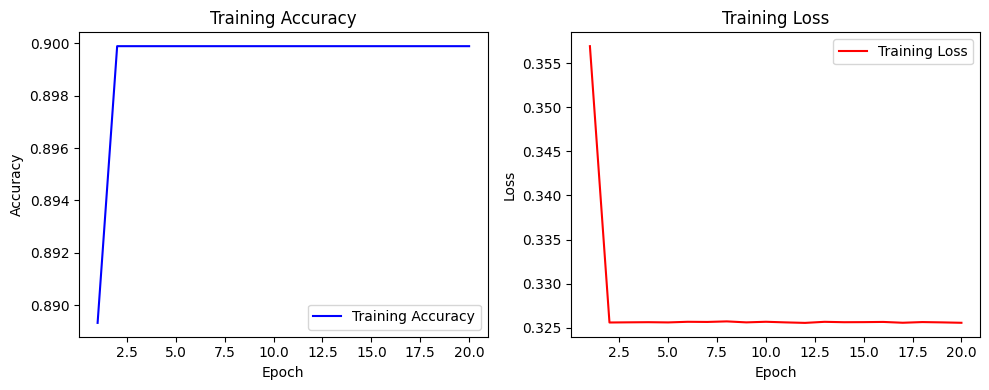

In [126]:
import matplotlib.pyplot as plt

# Extracting epochs
epochs = range(1, len(history_df) + 1)

# Plotting Training Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_df['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_df['loss'], label='Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()